In [1]:
import warnings
warnings.filterwarnings('ignore')

## Petrophysics calculation

In [2]:
import lasio
las=lasio.read('D:/Jupyter/Partsol/well-1.las') 

#convert the las file to pandas dataframe, this will automatically retain the logname and made the depth as index column
well=las.df()
print (well)

         CALI       DT      GR    ILD   MSFL  NPHI_LS   RHOB
DEPTH                                                       
3001.0  9.984  148.500  80.875  0.722  0.991  0.43701  2.170
3001.5  9.938  148.625  80.875  0.718  1.026  0.47705  2.176
3002.0  9.914  146.125  80.625  0.714  0.990  0.45947  2.166
3002.5  9.859  145.375  82.625  0.715  0.953  0.47754  2.158
3003.0  9.914  145.125  81.938  0.709  0.900  0.45508  2.156
...       ...      ...     ...    ...    ...      ...    ...
4458.0  8.484  109.000  79.812  1.122  1.744  0.33252  2.316
4458.5  8.469  109.438  82.312  1.112  1.972  0.34082  2.326
4459.0  8.484  109.562  77.188  1.092  1.959  0.35693  2.316
4459.5  8.461  110.750  75.250  1.079  1.746  0.37256  2.311
4460.0  8.469  110.938  75.188  1.067  1.625  0.36768  2.307

[2919 rows x 7 columns]


In [3]:
TugasFM=well.loc[3337.79:3751.5]
print (TugasFM)

         CALI       DT      GR    ILD   MSFL  NPHI_LS   RHOB
DEPTH                                                       
3338.0  8.617  123.625  88.812  1.006  1.292  0.48193  2.264
3338.5  8.562  116.875  79.500  1.182  1.258  0.46924  2.320
3339.0  8.594  100.000  68.562  1.417  1.250  0.37354  2.408
3339.5  8.492   83.938  51.500  1.742  1.430  0.21143  2.562
3340.0  8.297   65.750  33.844  2.174  7.311  0.13428  2.668
...       ...      ...     ...    ...    ...      ...    ...
3749.5  8.555  130.625  85.000  0.773  0.873  0.43115  2.184
3750.0  8.648  130.875  87.500  0.772  0.891  0.43164  2.170
3750.5  8.680  130.875  86.250  0.775  1.158  0.44092  2.178
3751.0  8.727  129.375  89.188  0.773  1.072  0.42285  2.184
3751.5  8.633  129.500  89.688  0.772  1.035  0.40430  2.191

[828 rows x 7 columns]


In [4]:
TugasFM.head()

,CALI,DT,GR,ILD,MSFL,NPHI_LS,RHOB
DEPTH,,,,,,,
3338.0,8.617,123.625,88.812,1.006,1.292,0.48193,2.264
3338.5,8.562,116.875,79.500,1.182,1.258,0.46924,2.320
3339.0,8.594,100.000,68.562,1.417,1.250,0.37354,2.408
3339.5,8.492,83.938,51.500,1.742,1.430,0.21143,2.562
3340.0,8.297,65.750,33.844,2.174,7.311,0.13428,2.668


In [5]:
#this code is adapted from andy mcdonald

def shale_volume(gamma_ray, gamma_ray_max, gamma_ray_min): #specify the arguments
    vshale = (gamma_ray - gamma_ray_min) / (gamma_ray_max - gamma_ray_min) #use the argument to the equation using math operators
    return round(vshale, 4)

def density_porosity(input_density, matrix_density, fluid_density):
    denpor = (matrix_density - input_density) / (matrix_density - fluid_density)
    return round(denpor, 4)

In [6]:
mDens= 2.65
fDens= 1
TugasFM['VSHALE']=shale_volume(TugasFM['GR'], TugasFM['GR'].quantile(q=0.99),
                             TugasFM['GR'].quantile(q=0.01))
TugasFM['PHI']=density_porosity(TugasFM['RHOB'], mDens, fDens)
TugasFM.head()

,CALI,DT,GR,ILD,MSFL,NPHI_LS,RHOB,VSHALE,PHI
DEPTH,,,,,,,,,
3338.0,8.617,123.625,88.812,1.006,1.292,0.48193,2.264,0.8678,0.2339
3338.5,8.562,116.875,79.500,1.182,1.258,0.46924,2.320,0.7119,0.2000
3339.0,8.594,100.000,68.562,1.417,1.250,0.37354,2.408,0.5289,0.1467
3339.5,8.492,83.938,51.500,1.742,1.430,0.21143,2.562,0.2433,0.0533
3340.0,8.297,65.750,33.844,2.174,7.311,0.13428,2.668,-0.0522,-0.0109


### Calculate RW and SW

**Apparent water formation resistivity using Hingle method**
<img src="rw.png">

**SW:**
<img src="sw_archie.png">

In [7]:
def rw_app(porosity, archieA, archieM, rt):
    rw= ((porosity ** archieM)*(rt/archieA))
    return rw

def sw_archie(porosity, rt, rw, archieA, archieM, archieN):
    sw = ((archieA / (porosity ** archieM)) * (rw/rt))**(1/archieN)
    return sw

archieA= 1
archieM= 2
archieN= 2

In [8]:
TugasFM['rw']= rw_app(TugasFM["NPHI_LS"], archieA, archieM, TugasFM["ILD"])
TugasFM.head ()

,CALI,DT,GR,ILD,MSFL,NPHI_LS,RHOB,VSHALE,PHI,rw
DEPTH,,,,,,,,,,
3338.0,8.617,123.625,88.812,1.006,1.292,0.48193,2.264,0.8678,0.2339,0.233650
3338.5,8.562,116.875,79.500,1.182,1.258,0.46924,2.320,0.7119,0.2000,0.260260
3339.0,8.594,100.000,68.562,1.417,1.250,0.37354,2.408,0.5289,0.1467,0.197717
3339.5,8.492,83.938,51.500,1.742,1.430,0.21143,2.562,0.2433,0.0533,0.077872
3340.0,8.297,65.750,33.844,2.174,7.311,0.13428,2.668,-0.0522,-0.0109,0.039200


In [9]:
TugasFM['SW'] = sw_archie(TugasFM["NPHI_LS"], TugasFM["ILD"], TugasFM["rw"], archieA, archieM, archieN)
TugasFM.head ()

,CALI,DT,GR,ILD,MSFL,NPHI_LS,RHOB,VSHALE,PHI,rw,SW
DEPTH,,,,,,,,,,,
3338.0,8.617,123.625,88.812,1.006,1.292,0.48193,2.264,0.8678,0.2339,0.233650,1.0
3338.5,8.562,116.875,79.500,1.182,1.258,0.46924,2.320,0.7119,0.2000,0.260260,1.0
3339.0,8.594,100.000,68.562,1.417,1.250,0.37354,2.408,0.5289,0.1467,0.197717,1.0
3339.5,8.492,83.938,51.500,1.742,1.430,0.21143,2.562,0.2433,0.0533,0.077872,1.0
3340.0,8.297,65.750,33.844,2.174,7.311,0.13428,2.668,-0.0522,-0.0109,0.039200,1.0


In [10]:
TugasFM.describe()

,CALI,DT,GR,ILD,MSFL,NPHI_LS,RHOB,VSHALE,PHI,rw,SW
count,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,8.280000e+02
mean,8.588909,118.736715,76.343841,1.109170,1.743801,0.381769,2.225851,0.659101,0.257057,0.154674,1.000000e+00
std,0.340040,12.152890,13.450552,0.408286,3.261412,0.053883,0.071534,0.225129,0.043354,0.032237,4.316309e-17
min,7.680000,57.625000,17.641000,0.563000,0.460000,0.119630,1.875000,-0.323400,-0.041800,0.039200,1.000000e+00
25%,8.344000,110.531000,69.188000,0.864750,1.119000,0.349120,2.188000,0.539300,0.238800,0.133070,1.000000e+00
50%,8.539000,119.375000,79.750000,1.061000,1.343500,0.387700,2.230000,0.716100,0.254500,0.152117,1.000000e+00
75%,8.758000,128.031250,85.453500,1.267250,1.583000,0.419920,2.256000,0.811575,0.280000,0.173003,1.000000e+00
max,10.422000,156.250000,101.188000,6.004000,42.829000,0.486330,2.719000,1.074900,0.469700,0.343277,1.000000e+00


## Data Handling

- ***explore the statistical information of the SW and RW log***
- ***compare the mean and the standard deviation of each log from the pandas result***
- ***visualize using histogram, boxplot, etc***

In [11]:
import pandas as pd

In [12]:
print ('mean for all variables in TugasFM: \n' + str(TugasFM.mean())+'\n')
print ('median for all variables in TugasFM: \n' + str(TugasFM.median()))
print ('range for all variables in TugasFM: \n' + str(TugasFM.max()-TugasFM.min())+'\n')
print ('variance for all variables in TugasFM: \n' + str(TugasFM.var())+'\n')
print ('standard deviation for all variables in TugasFM: \n' + str(TugasFM.std()))

mean for all variables in TugasFM: 
CALI         8.588909
DT         118.736715
GR          76.343841
ILD          1.109170
MSFL         1.743801
NPHI_LS      0.381769
RHOB         2.225851
VSHALE       0.659101
PHI          0.257057
rw           0.154674
SW           1.000000
dtype: float64

median for all variables in TugasFM: 
CALI         8.539000
DT         119.375000
GR          79.750000
ILD          1.061000
MSFL         1.343500
NPHI_LS      0.387700
RHOB         2.230000
VSHALE       0.716100
PHI          0.254500
rw           0.152117
SW           1.000000
dtype: float64
range for all variables in TugasFM: 
CALI       2.742000e+00
DT         9.862500e+01
GR         8.354700e+01
ILD        5.441000e+00
MSFL       4.236900e+01
NPHI_LS    3.667000e-01
RHOB       8.440000e-01
VSHALE     1.398300e+00
PHI        5.115000e-01
rw         3.040771e-01
SW         1.110223e-16
dtype: float64

variance for all variables in TugasFM: 
CALI       1.156269e-01
DT         1.476927e+02
GR    

In [13]:
dataRW=TugasFM["rw"]
print (dataRW)

DEPTH
3338.0    0.233650
3338.5    0.260260
3339.0    0.197717
3339.5    0.077872
3340.0    0.039200
            ...   
3749.5    0.143693
3750.0    0.143834
3750.5    0.150668
3751.0    0.138214
3751.5    0.126190
Name: rw, Length: 828, dtype: float64


In [14]:
dataSW=TugasFM["SW"]
print (dataSW)

DEPTH
3338.0    1.0
3338.5    1.0
3339.0    1.0
3339.5    1.0
3340.0    1.0
         ... 
3749.5    1.0
3750.0    1.0
3750.5    1.0
3751.0    1.0
3751.5    1.0
Name: SW, Length: 828, dtype: float64


In [15]:
print ('mean for all variables in dataRW: \n' + str(dataRW.mean())+'\n')
print ('median for all variables in dataRW: \n' + str(dataRW.median()))
print ('range for all variables in dataRW: \n' + str(dataRW.max()-dataRW.min())+'\n')
print ('variance for all variables in dataRW: \n' + str(dataRW.var())+'\n')
print ('standard deviation for all variables in dataRW: \n' + str(dataRW.std()))

mean for all variables in dataRW: 
0.15467437370849638

median for all variables in dataRW: 
0.15211732460330002
range for all variables in dataRW: 
0.3040770627004

variance for all variables in dataRW: 
0.0010392090813242227

standard deviation for all variables in dataRW: 
0.03223676598736639


In [16]:
print ('mean for all variables in dataSW: \n' + str(dataSW.mean())+'\n')
print ('median for all variables in dataSW: \n' + str(dataSW.median()))
print ('range for all variables in dataSW: \n' + str(dataSW.max()-dataSW.min())+'\n')
print ('variance for all variables in dataSW: \n' + str(dataSW.var())+'\n')
print ('standard deviation for all variables in dataSW: \n' + str(dataSW.std()))

mean for all variables in dataSW: 
1.0

median for all variables in dataSW: 
1.0
range for all variables in dataSW: 
1.1102230246251565e-16

variance for all variables in dataSW: 
1.863051941366129e-33

standard deviation for all variables in dataSW: 
4.316308540137196e-17


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
print(dataRW.describe())

count    828.000000
mean       0.154674
std        0.032237
min        0.039200
25%        0.133070
50%        0.152117
75%        0.173003
max        0.343277
Name: rw, dtype: float64


In [19]:
print(dataSW.describe())

count    8.280000e+02
mean     1.000000e+00
std      4.316309e-17
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: SW, dtype: float64


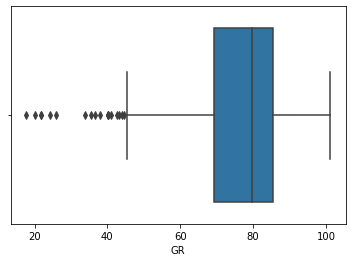

In [20]:
sns.boxplot(TugasFM['GR'])
plt.show()

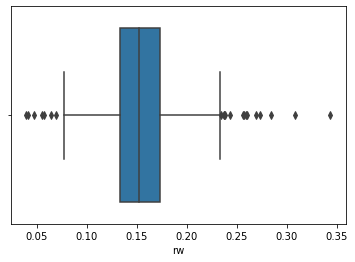

In [21]:
sns.boxplot(TugasFM['rw'])
plt.show()

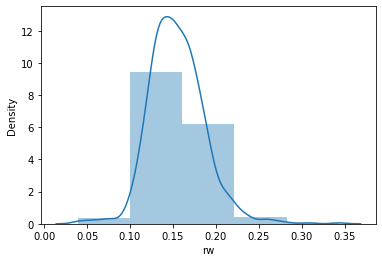

In [22]:
sns.distplot(TugasFM["rw"], bins=5)
plt.show()

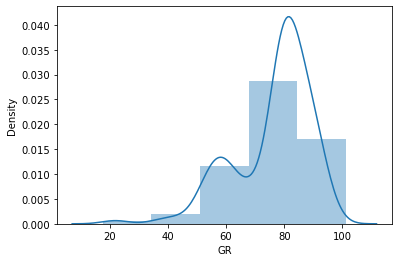

In [23]:
sns.distplot(TugasFM["GR"], bins=5)
plt.show()